In [1]:
import sklearn as sk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [132]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.losses import mean_squared_error
from keras import backend as K

In [167]:
X = pd.read_csv('~/Datas/KaggleHouse/X_train_V2.csv',header=None).to_numpy()
y = pd.read_csv('~/Datas/KaggleHouse/Y_train_V2.csv',header=None).to_numpy()
X_final = pd.read_csv('~/Datas/KaggleHouse/X_test_V2.csv',header=None).to_numpy()
Id = pd.read_csv('~/Datas/KaggleHouse/Id.csv',header=None,names=['Id'])
X.shape

(1456, 405)

In [168]:
IN_DIM = X.shape[1]
TRAIN_LEN = X.shape[0]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [169]:
def plotHistory(history):
    import matplotlib.pyplot as plt
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [170]:
def pred(model):
    return model.predict(X_final)

In [171]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [172]:
### Too much precision lost by using tensorflow
### 2.718281828459045 -> 2.71828183
def exp_root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(K.exp(y_pred)-K.exp(y_true))))

In [173]:
NN_500E_Adam = Sequential()
NN_500E_Adam.add(Dense(512,input_dim = IN_DIM,activation = 'relu'))
NN_500E_Adam.add(Dense(512,activation = 'relu'))
NN_500E_Adam.add(Dense(512,activation = 'relu'))
NN_500E_Adam.add(Dense(1))

In [174]:
es = EarlyStopping(monitor='val_loss', patience = 50, mode='min', restore_best_weights=True, verbose=1)
NN_500E_Adam.compile(loss=root_mean_squared_error, optimizer='adam')
history = NN_500E_Adam.fit(x=X,y=y,batch_size=TRAIN_LEN,epochs=500,validation_split=0.3,callbacks=[es])

Train on 1019 samples, validate on 437 samples
Epoch 1/500
1019/1019 [==============================] - 0s 147us/step - loss: 165.5607 - val_loss: 1987.4303
Epoch 2/500
1019/1019 [==============================] - 0s 24us/step - loss: 2633.1904 - val_loss: 1525.4037
Epoch 3/500
1019/1019 [==============================] - 0s 23us/step - loss: 2033.4384 - val_loss: 668.5825
Epoch 4/500
1019/1019 [==============================] - 0s 23us/step - loss: 890.2421 - val_loss: 277.1201
Epoch 5/500
1019/1019 [==============================] - 0s 22us/step - loss: 391.6042 - val_loss: 451.3574
Epoch 6/500
1019/1019 [==============================] - 0s 23us/step - loss: 629.1174 - val_loss: 290.9961
Epoch 7/500
1019/1019 [==============================] - 0s 23us/step - loss: 404.4802 - val_loss: 44.2882
Epoch 8/500
1019/1019 [==============================] - 0s 23us/step - loss: 53.9037 - val_loss: 99.5665
Epoch 9/500
1019/1019 [==============================] - 0s 24us/step - loss: 135.4323 

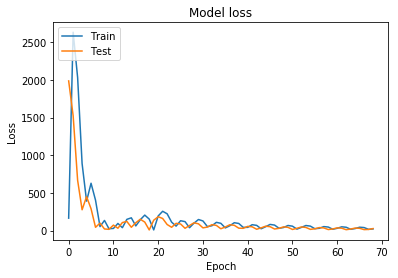

In [175]:
NN_500E_Adam.save('/home/louisliu2096/Models/KaggleHouse/NN_500E_Adam_V2_Es.h5')
plt = plotHistory(history)
plt

In [78]:
NN_500E_NewAdam = Sequential()
NN_500E_NewAdam.add(Dense(512,input_dim = IN_DIM,activation = 'relu'))
NN_500E_NewAdam.add(Dense(512,activation = 'relu'))
NN_500E_NewAdam.add(Dense(512,activation = 'relu'))
NN_500E_NewAdam.add(Dense(1))

In [79]:
from keras.optimizers import Adam
newAdam = Adam(learning_rate=0.0005)
NN_500E_NewAdam.compile(loss=root_mean_squared_error, optimizer=newAdam)
history = NN_500E_NewAdam.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1164 samples, validate on 292 samples
Epoch 1/500
1164/1164 [==============================] - 0s 300us/step - loss: 148543.6407 - val_loss: 92017.5689
Epoch 2/500
1164/1164 [==============================] - 0s 169us/step - loss: 95069.6305 - val_loss: 63413.2130
Epoch 3/500
1164/1164 [==============================] - 0s 165us/step - loss: 65197.5775 - val_loss: 50614.4189
Epoch 4/500
1164/1164 [==============================] - 0s 163us/step - loss: 49147.6446 - val_loss: 45944.5010
Epoch 5/500
1164/1164 [==============================] - 0s 161us/step - loss: 45520.8952 - val_loss: 43939.2352
Epoch 6/500
1164/1164 [==============================] - 0s 163us/step - loss: 42889.4300 - val_loss: 42513.9320
Epoch 7/500
1164/1164 [==============================] - 0s 162us/step - loss: 41225.1446 - val_loss: 41413.3865
Epoch 8/500
1164/1164 [==============================] - 0s 164us/step - loss: 40358.3156 - val_loss: 40452.0210
Epoch 9/500
1164/1164 [=========================

1164/1164 [==============================] - 0s 160us/step - loss: 34520.3321 - val_loss: 40756.9881
Epoch 73/500
1164/1164 [==============================] - 0s 162us/step - loss: 33801.9173 - val_loss: 38212.9342
Epoch 74/500
1164/1164 [==============================] - 0s 163us/step - loss: 34622.5953 - val_loss: 38874.0683
Epoch 75/500
1164/1164 [==============================] - 0s 164us/step - loss: 34560.0943 - val_loss: 38130.1095
Epoch 76/500
1164/1164 [==============================] - 0s 164us/step - loss: 34121.2530 - val_loss: 37705.3349
Epoch 77/500
1164/1164 [==============================] - 0s 160us/step - loss: 33761.6682 - val_loss: 37678.3809
Epoch 78/500
1164/1164 [==============================] - 0s 162us/step - loss: 34488.6496 - val_loss: 38135.3879
Epoch 79/500
1164/1164 [==============================] - 0s 162us/step - loss: 33566.9425 - val_loss: 38152.0231
Epoch 80/500
1164/1164 [==============================] - 0s 159us/step - loss: 33350.5716 - val_loss

1164/1164 [==============================] - 0s 173us/step - loss: 30300.9578 - val_loss: 37120.4281
Epoch 144/500
1164/1164 [==============================] - 0s 174us/step - loss: 28803.7107 - val_loss: 39837.7526
Epoch 145/500
1164/1164 [==============================] - 0s 175us/step - loss: 29633.7259 - val_loss: 37700.4394
Epoch 146/500
1164/1164 [==============================] - 0s 177us/step - loss: 28818.7375 - val_loss: 37649.8676
Epoch 147/500
1164/1164 [==============================] - 0s 178us/step - loss: 28790.7979 - val_loss: 37344.8975
Epoch 148/500
1164/1164 [==============================] - 0s 173us/step - loss: 29145.6958 - val_loss: 37731.7047
Epoch 149/500
1164/1164 [==============================] - 0s 175us/step - loss: 30112.2863 - val_loss: 37618.3568
Epoch 150/500
1164/1164 [==============================] - 0s 175us/step - loss: 28796.9386 - val_loss: 38545.3280
Epoch 151/500
1164/1164 [==============================] - 0s 174us/step - loss: 28313.8811 - 

1164/1164 [==============================] - 0s 162us/step - loss: 24401.0984 - val_loss: 39681.9774
Epoch 215/500
1164/1164 [==============================] - 0s 162us/step - loss: 23616.3471 - val_loss: 38754.3473
Epoch 216/500
1164/1164 [==============================] - 0s 160us/step - loss: 23108.1409 - val_loss: 37380.7876
Epoch 217/500
1164/1164 [==============================] - 0s 162us/step - loss: 22562.6091 - val_loss: 37394.2743
Epoch 218/500
1164/1164 [==============================] - 0s 162us/step - loss: 22837.3616 - val_loss: 38803.2634
Epoch 219/500
1164/1164 [==============================] - 0s 159us/step - loss: 23034.9099 - val_loss: 37851.3889
Epoch 220/500
1164/1164 [==============================] - 0s 161us/step - loss: 22472.5834 - val_loss: 38274.6259
Epoch 221/500
1164/1164 [==============================] - 0s 161us/step - loss: 23944.4890 - val_loss: 38943.7165
Epoch 222/500
1164/1164 [==============================] - 0s 160us/step - loss: 23138.5698 - 

1164/1164 [==============================] - 0s 160us/step - loss: 19223.7877 - val_loss: 38843.5109
Epoch 286/500
1164/1164 [==============================] - 0s 161us/step - loss: 18868.5739 - val_loss: 37600.3272
Epoch 287/500
1164/1164 [==============================] - 0s 161us/step - loss: 18485.2802 - val_loss: 38107.1495
Epoch 288/500
1164/1164 [==============================] - 0s 159us/step - loss: 18463.5082 - val_loss: 40261.4744
Epoch 289/500
1164/1164 [==============================] - 0s 160us/step - loss: 19218.3906 - val_loss: 40034.7559
Epoch 290/500
1164/1164 [==============================] - 0s 160us/step - loss: 19275.4340 - val_loss: 38474.6564
Epoch 291/500
1164/1164 [==============================] - 0s 158us/step - loss: 18869.3455 - val_loss: 37746.1772
Epoch 292/500
1164/1164 [==============================] - 0s 160us/step - loss: 20223.0720 - val_loss: 37732.5231
Epoch 293/500
1164/1164 [==============================] - 0s 158us/step - loss: 20127.6555 - 

1164/1164 [==============================] - 0s 172us/step - loss: 15884.4802 - val_loss: 39214.2293
Epoch 357/500
1164/1164 [==============================] - 0s 169us/step - loss: 16879.8036 - val_loss: 39219.8838
Epoch 358/500
1164/1164 [==============================] - 0s 170us/step - loss: 15991.7709 - val_loss: 39620.2223
Epoch 359/500
1164/1164 [==============================] - 0s 168us/step - loss: 15310.2276 - val_loss: 40906.7883
Epoch 360/500
1164/1164 [==============================] - 0s 169us/step - loss: 18096.1780 - val_loss: 41176.5976
Epoch 361/500
1164/1164 [==============================] - 0s 169us/step - loss: 15911.4205 - val_loss: 39136.8223
Epoch 362/500
1164/1164 [==============================] - 0s 170us/step - loss: 15799.2978 - val_loss: 39932.8179
Epoch 363/500
1164/1164 [==============================] - 0s 169us/step - loss: 15710.5642 - val_loss: 39267.6482
Epoch 364/500
1164/1164 [==============================] - 0s 167us/step - loss: 14945.9055 - 

1164/1164 [==============================] - 0s 158us/step - loss: 14523.6876 - val_loss: 43397.1966
Epoch 428/500
1164/1164 [==============================] - 0s 160us/step - loss: 13716.2277 - val_loss: 41724.9843
Epoch 429/500
1164/1164 [==============================] - 0s 160us/step - loss: 13037.9280 - val_loss: 40554.8354
Epoch 430/500
1164/1164 [==============================] - 0s 160us/step - loss: 13784.9459 - val_loss: 40448.4096
Epoch 431/500
1164/1164 [==============================] - 0s 161us/step - loss: 13848.4145 - val_loss: 42653.8635
Epoch 432/500
1164/1164 [==============================] - 0s 161us/step - loss: 13699.0293 - val_loss: 40299.0116
Epoch 433/500
1164/1164 [==============================] - 0s 159us/step - loss: 12071.9218 - val_loss: 40882.2461
Epoch 434/500
1164/1164 [==============================] - 0s 161us/step - loss: 13329.4149 - val_loss: 40500.4345
Epoch 435/500
1164/1164 [==============================] - 0s 163us/step - loss: 13399.1613 - 

1164/1164 [==============================] - 0s 163us/step - loss: 12505.8379 - val_loss: 42329.2046
Epoch 499/500
1164/1164 [==============================] - 0s 161us/step - loss: 11581.0677 - val_loss: 41041.9296
Epoch 500/500
1164/1164 [==============================] - 0s 159us/step - loss: 11132.4347 - val_loss: 42397.6687


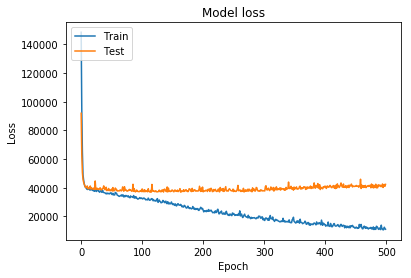

In [80]:
plt = plotHistory(history)
plt

In [110]:
NN_500E_NewAdam.save('NN_5000E_NewAdam_V2.h5')

In [21]:
NN_5000E_Adam_Sig = Sequential()
NN_5000E_Adam_Sig.add(Dense(512,input_dim = 330,activation = 'sigmoid'))
NN_5000E_Adam_Sig.add(Dense(512,activation = 'sigmoid'))
NN_5000E_Adam_Sig.add(Dense(512,activation = 'sigmoid'))
NN_5000E_Adam_Sig.add(Dense(1))
NN_5000E_Adam_Sig.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               169472    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 695,297
Trainable params: 695,297
Non-trainable params: 0
_________________________________________________________________


In [24]:
newAdam = Adam(learning_rate=0.0005)
NN_5000E_Adam_Sig.compile(loss=root_mean_squared_error, optimizer=newAdam)
history = NN_5000E_Adam_Sig.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 0s 364us/step - loss: 37765465534.6290 - val_loss: 38856311962.3014
Epoch 2/500
1167/1167 [==============================] - 0s 253us/step - loss: 37760839083.3248 - val_loss: 38851632927.5616
Epoch 3/500
1167/1167 [==============================] - 0s 249us/step - loss: 37756176252.3805 - val_loss: 38846826748.4931
Epoch 4/500
1167/1167 [==============================] - 0s 253us/step - loss: 37751193261.2991 - val_loss: 38841367622.1370
Epoch 5/500
1167/1167 [==============================] - 0s 248us/step - loss: 37745548971.5441 - val_loss: 38835620204.7123
Epoch 6/500
1167/1167 [==============================] - 0s 239us/step - loss: 37739652777.7892 - val_loss: 38829458361.8630
Epoch 7/500
1167/1167 [==============================] - 0s 245us/step - loss: 37733663901.0660 - val_loss: 38823570894.9041
Epoch 8/500
1167/1167 [==============================] - 0s 249us/step - loss:

Epoch 66/500
1167/1167 [==============================] - 0s 254us/step - loss: 37420806614.3205 - val_loss: 38508010622.2466
Epoch 67/500
1167/1167 [==============================] - 0s 254us/step - loss: 37415536322.3582 - val_loss: 38502743671.2329
Epoch 68/500
1167/1167 [==============================] - 0s 237us/step - loss: 37410309570.1388 - val_loss: 38497450797.5890
Epoch 69/500
1167/1167 [==============================] - 0s 240us/step - loss: 37405076672.1645 - val_loss: 38492161066.0822
Epoch 70/500
1167/1167 [==============================] - 0s 248us/step - loss: 37399840706.5776 - val_loss: 38486900736.0000
Epoch 71/500
1167/1167 [==============================] - 0s 245us/step - loss: 37394613480.5278 - val_loss: 38481583735.2329
Epoch 72/500
1167/1167 [==============================] - 0s 240us/step - loss: 37389368189.2579 - val_loss: 38476314427.6164
Epoch 73/500
1167/1167 [==============================] - 0s 244us/step - loss: 37384131820.0377 - val_loss: 384710265

Epoch 131/500
1167/1167 [==============================] - 0s 247us/step - loss: 37081676500.7849 - val_loss: 38165743924.6027
Epoch 132/500
1167/1167 [==============================] - 0s 253us/step - loss: 37076492333.6281 - val_loss: 38160474673.0959
Epoch 133/500
1167/1167 [==============================] - 0s 244us/step - loss: 37071288535.8560 - val_loss: 38155209068.7123
Epoch 134/500
1167/1167 [==============================] - 0s 237us/step - loss: 37066082467.2082 - val_loss: 38149985097.6438
Epoch 135/500
1167/1167 [==============================] - 0s 259us/step - loss: 37060892203.4344 - val_loss: 38144735708.9315
Epoch 136/500
1167/1167 [==============================] - 0s 254us/step - loss: 37055698521.0626 - val_loss: 38139490808.9863
Epoch 137/500
1167/1167 [==============================] - 0s 240us/step - loss: 37050510521.1448 - val_loss: 38134242766.9041
Epoch 138/500
1167/1167 [==============================] - 0s 244us/step - loss: 37045310631.5955 - val_loss: 3

1167/1167 [==============================] - 0s 247us/step - loss: 36419954521.2819 - val_loss: 37497654173.8082
Epoch 260/500
1167/1167 [==============================] - 0s 248us/step - loss: 36414807691.9554 - val_loss: 37492467964.4931
Epoch 261/500
1167/1167 [==============================] - 0s 243us/step - loss: 36409664979.6881 - val_loss: 37487280240.2192
Epoch 262/500
1167/1167 [==============================] - 0s 247us/step - loss: 36404526596.8260 - val_loss: 37482079274.0822
Epoch 263/500
1167/1167 [==============================] - 0s 247us/step - loss: 36399381996.2571 - val_loss: 37476889922.6301
Epoch 264/500
1167/1167 [==============================] - 0s 247us/step - loss: 36394242837.7172 - val_loss: 37471721556.1644
Epoch 265/500
1167/1167 [==============================] - 0s 245us/step - loss: 36389099426.9889 - val_loss: 37466531755.8356
Epoch 266/500
1167/1167 [==============================] - 0s 243us/step - loss: 36383964840.0343 - val_loss: 37461280178.849

1167/1167 [==============================] - 0s 251us/step - loss: 35765347483.3111 - val_loss: 36836729617.5342
Epoch 388/500
1167/1167 [==============================] - 0s 251us/step - loss: 35760273351.8423 - val_loss: 36831582572.7123
Epoch 389/500
1167/1167 [==============================] - 0s 241us/step - loss: 35755194403.0985 - val_loss: 36826471101.3699
Epoch 390/500
1167/1167 [==============================] - 0s 255us/step - loss: 35750124121.9400 - val_loss: 36821362547.7260
Epoch 391/500
1167/1167 [==============================] - 0s 250us/step - loss: 35745035900.1611 - val_loss: 36816217578.9589
Epoch 392/500
1167/1167 [==============================] - 0s 243us/step - loss: 35739942648.7609 - val_loss: 36811075527.8904
Epoch 393/500
1167/1167 [==============================] - 0s 245us/step - loss: 35734834733.1894 - val_loss: 36805947392.0000
Epoch 394/500
1167/1167 [==============================] - 0s 252us/step - loss: 35729741021.9983 - val_loss: 36800814711.232

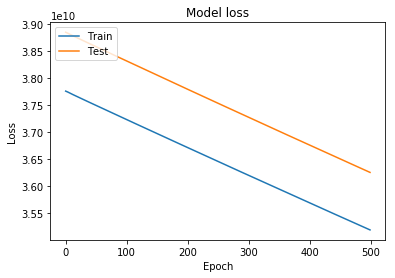

In [25]:
plt = plotHistory(history)
plt

In [27]:
NN_5000E_Adam_4H = Sequential()
NN_5000E_Adam_4H.add(Dense(512,input_dim = 330,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(512,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(512,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(512,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(512,activation = 'relu'))
NN_5000E_Adam_4H.add(Dense(1))
NN_5000E_Adam_4H.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               169472    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 1,220,609
Trainable params: 1,220,609
Non-trainable params: 0
____________________________________________

In [30]:
newAdam = Adam(learning_rate=0.0001)
NN_5000E_Adam_4H.compile(loss='mean_squared_error', optimizer=newAdam)
history = NN_5000E_Adam_4H.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 1s 564us/step - loss: 36522277088.6307 - val_loss: 31151011924.1644
Epoch 2/500
1167/1167 [==============================] - 0s 427us/step - loss: 20591323523.4002 - val_loss: 10548069663.5616
Epoch 3/500
1167/1167 [==============================] - 0s 427us/step - loss: 14787735020.2571 - val_loss: 9263632727.6712
Epoch 4/500
1167/1167 [==============================] - 1s 437us/step - loss: 12293208674.7147 - val_loss: 7920128925.8082
Epoch 5/500
1167/1167 [==============================] - 1s 435us/step - loss: 9516187921.4396 - val_loss: 5965733312.8767
Epoch 6/500
1167/1167 [==============================] - 1s 437us/step - loss: 6733085789.2853 - val_loss: 4627476713.2055
Epoch 7/500
1167/1167 [==============================] - 1s 443us/step - loss: 4693404259.3728 - val_loss: 4056714520.5479
Epoch 8/500
1167/1167 [==============================] - 1s 431us/step - loss: 3240308

Epoch 132/500
1167/1167 [==============================] - 0s 427us/step - loss: 1228621927.9246 - val_loss: 2713756279.2329
Epoch 133/500
1167/1167 [==============================] - 0s 410us/step - loss: 1170014581.2511 - val_loss: 2879766373.6986
Epoch 134/500
1167/1167 [==============================] - 1s 429us/step - loss: 1151639312.4524 - val_loss: 2739778556.4932
Epoch 135/500
1167/1167 [==============================] - 1s 431us/step - loss: 1161729214.9032 - val_loss: 2823046936.5479
Epoch 136/500
1167/1167 [==============================] - 0s 426us/step - loss: 1136940189.0660 - val_loss: 2735173772.2740
Epoch 137/500
1167/1167 [==============================] - 0s 425us/step - loss: 1374524349.3402 - val_loss: 2740995797.9178
Epoch 138/500
1167/1167 [==============================] - 1s 432us/step - loss: 1256290006.7592 - val_loss: 2676047721.2055
Epoch 139/500
1167/1167 [==============================] - 0s 422us/step - loss: 1219013163.5441 - val_loss: 3056892068.8219


1167/1167 [==============================] - 0s 426us/step - loss: 809903481.3093 - val_loss: 2481664671.5616
Epoch 264/500
1167/1167 [==============================] - 1s 433us/step - loss: 817842361.8578 - val_loss: 2401059868.0548
Epoch 265/500
1167/1167 [==============================] - 1s 430us/step - loss: 827466964.1542 - val_loss: 2538248945.9726
Epoch 266/500
1167/1167 [==============================] - 1s 430us/step - loss: 820705424.0686 - val_loss: 2347676878.9041
Epoch 267/500
1167/1167 [==============================] - 1s 434us/step - loss: 825997942.4850 - val_loss: 2434173759.1233
Epoch 268/500
1167/1167 [==============================] - 0s 427us/step - loss: 895748078.3959 - val_loss: 2428477632.8767
Epoch 269/500
1167/1167 [==============================] - 1s 436us/step - loss: 822585974.5124 - val_loss: 2452980557.1507
Epoch 270/500
1167/1167 [==============================] - 1s 442us/step - loss: 801043098.4884 - val_loss: 2391332821.9178
Epoch 271/500
1167/116

1167/1167 [==============================] - 0s 419us/step - loss: 637857781.4156 - val_loss: 2214793082.7397
Epoch 396/500
1167/1167 [==============================] - 1s 439us/step - loss: 583126219.6264 - val_loss: 2182806457.8630
Epoch 397/500
1167/1167 [==============================] - 0s 423us/step - loss: 628089033.9263 - val_loss: 2403850236.4932
Epoch 398/500
1167/1167 [==============================] - 1s 441us/step - loss: 599288422.6358 - val_loss: 2366905063.4521
Epoch 399/500
1167/1167 [==============================] - 0s 428us/step - loss: 626103832.1302 - val_loss: 2407291341.1507
Epoch 400/500
1167/1167 [==============================] - 0s 424us/step - loss: 570548071.0746 - val_loss: 2214153749.0411
Epoch 401/500
1167/1167 [==============================] - 1s 433us/step - loss: 600729730.2211 - val_loss: 2782370617.8630
Epoch 402/500
1167/1167 [==============================] - 1s 439us/step - loss: 616668776.5553 - val_loss: 2386182559.5616
Epoch 403/500
1167/116

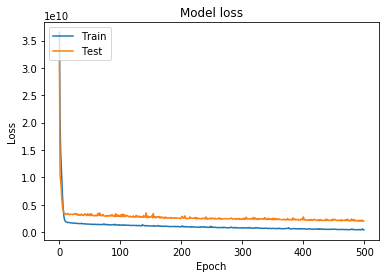

In [31]:
plt = plotHistory(history)
plt

In [34]:
NN_5000E_Adam_32 = Sequential()
NN_5000E_Adam_32.add(Dense(32,input_dim = 330,activation = 'relu'))
NN_5000E_Adam_32.add(Dense(32,activation = 'relu'))
NN_5000E_Adam_32.add(Dense(32,activation = 'relu'))
NN_5000E_Adam_32.add(Dense(1))
NN_5000E_Adam_32.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                10592     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 12,737
Trainable params: 12,737
Non-trainable params: 0
_________________________________________________________________


In [35]:
newAdam = Adam(learning_rate=0.0001)
NN_5000E_Adam_32.compile(loss='mean_squared_error', optimizer=newAdam)
history = NN_5000E_Adam_32.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 0s 173us/step - loss: 38706398633.5698 - val_loss: 39777723770.7397
Epoch 2/500
1167/1167 [==============================] - 0s 59us/step - loss: 38636421785.1174 - val_loss: 39698240722.4110
Epoch 3/500
1167/1167 [==============================] - 0s 60us/step - loss: 38542318570.0634 - val_loss: 39589462240.4384
Epoch 4/500
1167/1167 [==============================] - 0s 59us/step - loss: 38415337147.3385 - val_loss: 39443433948.9315
Epoch 5/500
1167/1167 [==============================] - 0s 58us/step - loss: 38248806998.4302 - val_loss: 39249987275.3973
Epoch 6/500
1167/1167 [==============================] - 0s 59us/step - loss: 38010765052.2708 - val_loss: 38963096646.1370
Epoch 7/500
1167/1167 [==============================] - 0s 62us/step - loss: 37672731139.9486 - val_loss: 38570601149.3699
Epoch 8/500
1167/1167 [==============================] - 0s 60us/step - loss: 372209

Epoch 67/500
1167/1167 [==============================] - 0s 60us/step - loss: 6317624499.0026 - val_loss: 5556530887.8904
Epoch 68/500
1167/1167 [==============================] - 0s 59us/step - loss: 6214892520.7472 - val_loss: 5502116827.1781
Epoch 69/500
1167/1167 [==============================] - 0s 58us/step - loss: 6116913004.8055 - val_loss: 5452863030.3562
Epoch 70/500
1167/1167 [==============================] - 0s 60us/step - loss: 6025396548.6615 - val_loss: 5398700131.9452
Epoch 71/500
1167/1167 [==============================] - 0s 58us/step - loss: 5953267253.3059 - val_loss: 5374689651.7260
Epoch 72/500
1167/1167 [==============================] - 0s 57us/step - loss: 5810141920.4113 - val_loss: 5317422718.2466
Epoch 73/500
1167/1167 [==============================] - 0s 57us/step - loss: 5734094331.1740 - val_loss: 5277504990.6849
Epoch 74/500
1167/1167 [==============================] - 0s 59us/step - loss: 5636116918.2931 - val_loss: 5215588639.5616
Epoch 75/500
116

Epoch 199/500
1167/1167 [==============================] - 0s 61us/step - loss: 1642946155.7635 - val_loss: 3378011390.2466
Epoch 200/500
1167/1167 [==============================] - 0s 57us/step - loss: 1643436666.3239 - val_loss: 3388817851.6164
Epoch 201/500
1167/1167 [==============================] - 0s 59us/step - loss: 1641126022.1422 - val_loss: 3370086361.4247
Epoch 202/500
1167/1167 [==============================] - 0s 60us/step - loss: 1640486235.0368 - val_loss: 3368569985.7534
Epoch 203/500
1167/1167 [==============================] - 0s 57us/step - loss: 1640567324.9015 - val_loss: 3365025458.8493
Epoch 204/500
1167/1167 [==============================] - 0s 56us/step - loss: 1636792076.9152 - val_loss: 3356467892.6027
Epoch 205/500
1167/1167 [==============================] - 0s 55us/step - loss: 1633960917.0043 - val_loss: 3374617394.8493
Epoch 206/500
1167/1167 [==============================] - 0s 55us/step - loss: 1637340350.7798 - val_loss: 3348085214.6849
Epoch 20

1167/1167 [==============================] - 0s 60us/step - loss: 1570279104.1097 - val_loss: 3324334576.2192
Epoch 266/500
1167/1167 [==============================] - 0s 58us/step - loss: 1568328393.8166 - val_loss: 3333199596.7123
Epoch 267/500
1167/1167 [==============================] - 0s 57us/step - loss: 1569793750.1560 - val_loss: 3337802536.3288
Epoch 268/500
1167/1167 [==============================] - 0s 59us/step - loss: 1566240392.4456 - val_loss: 3336586560.8767
Epoch 269/500
1167/1167 [==============================] - 0s 59us/step - loss: 1568994391.8423 - val_loss: 3313692328.3288
Epoch 270/500
1167/1167 [==============================] - 0s 59us/step - loss: 1567468620.2296 - val_loss: 3312366188.7123
Epoch 271/500
1167/1167 [==============================] - 0s 59us/step - loss: 1564970378.9683 - val_loss: 3312891207.8904
Epoch 272/500
1167/1167 [==============================] - 0s 60us/step - loss: 1566892999.8423 - val_loss: 3317635817.2055
Epoch 273/500
1167/116

1167/1167 [==============================] - 0s 58us/step - loss: 1486969053.2305 - val_loss: 3231215961.4247
Epoch 398/500
1167/1167 [==============================] - 0s 58us/step - loss: 1485900301.8201 - val_loss: 3240620473.8630
Epoch 399/500
1167/1167 [==============================] - 0s 59us/step - loss: 1490707363.6470 - val_loss: 3247976372.6027
Epoch 400/500
1167/1167 [==============================] - 0s 57us/step - loss: 1488909484.6410 - val_loss: 3274217538.6301
Epoch 401/500
1167/1167 [==============================] - 0s 61us/step - loss: 1495862845.0934 - val_loss: 3234048885.4795
Epoch 402/500
1167/1167 [==============================] - 0s 60us/step - loss: 1485780904.8569 - val_loss: 3238229065.6438
Epoch 403/500
1167/1167 [==============================] - 0s 59us/step - loss: 1487108986.9546 - val_loss: 3245870991.7808
Epoch 404/500
1167/1167 [==============================] - 0s 59us/step - loss: 1490039268.5793 - val_loss: 3216480452.3836
Epoch 405/500
1167/116

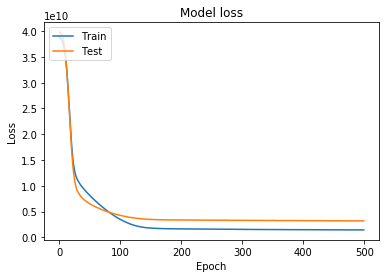

In [36]:
plt = plotHistory(history)
plt

In [40]:
NN_5000E_Adam_128 = Sequential()
NN_5000E_Adam_128.add(Dense(128,input_dim = 330,activation = 'relu'))
NN_5000E_Adam_128.add(Dense(128,activation = 'relu'))
NN_5000E_Adam_128.add(Dense(128,activation = 'relu'))
NN_5000E_Adam_128.add(Dense(1))
NN_5000E_Adam_128.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               42368     
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_27 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 129       
Total params: 75,521
Trainable params: 75,521
Non-trainable params: 0
_________________________________________________________________


In [41]:
newAdam = Adam(learning_rate=0.0001)
NN_5000E_Adam_128.compile(loss='mean_squared_error', optimizer=newAdam)
history = NN_5000E_Adam_128.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 0s 187us/step - loss: 38690821717.5527 - val_loss: 39492075295.5616
Epoch 2/500
1167/1167 [==============================] - 0s 81us/step - loss: 38067167105.6452 - val_loss: 38787898438.1370
Epoch 3/500
1167/1167 [==============================] - 0s 82us/step - loss: 37190807258.9272 - val_loss: 37712415982.4658
Epoch 4/500
1167/1167 [==============================] - 0s 82us/step - loss: 35843968595.7978 - val_loss: 36016919930.7397
Epoch 5/500
1167/1167 [==============================] - 0s 78us/step - loss: 33685374161.7138 - val_loss: 33240283023.7808
Epoch 6/500
1167/1167 [==============================] - 0s 80us/step - loss: 30315134535.5133 - val_loss: 29067547633.9726
Epoch 7/500
1167/1167 [==============================] - 0s 77us/step - loss: 25726978767.5201 - val_loss: 23658073130.0822
Epoch 8/500
1167/1167 [==============================] - 0s 77us/step - loss: 206877

1167/1167 [==============================] - 0s 77us/step - loss: 1765073418.6941 - val_loss: 3411879232.8767
Epoch 68/500
1167/1167 [==============================] - 0s 76us/step - loss: 1758582463.3967 - val_loss: 3396047347.7260
Epoch 69/500
1167/1167 [==============================] - 0s 75us/step - loss: 1744228315.3111 - val_loss: 3391115974.1370
Epoch 70/500
1167/1167 [==============================] - 0s 75us/step - loss: 1740766425.8303 - val_loss: 3383109579.3973
Epoch 71/500
1167/1167 [==============================] - 0s 77us/step - loss: 1731204590.8895 - val_loss: 3370837176.1096
Epoch 72/500
1167/1167 [==============================] - 0s 78us/step - loss: 1725354745.0900 - val_loss: 3366179091.2877
Epoch 73/500
1167/1167 [==============================] - 0s 77us/step - loss: 1718979936.6307 - val_loss: 3377862207.1233
Epoch 74/500
1167/1167 [==============================] - 0s 79us/step - loss: 1712693046.8415 - val_loss: 3371860983.2329
Epoch 75/500
1167/1167 [=====

1167/1167 [==============================] - 0s 76us/step - loss: 1459983632.4524 - val_loss: 3164350236.0548
Epoch 200/500
1167/1167 [==============================] - 0s 77us/step - loss: 1459066925.9023 - val_loss: 3197279603.7260
Epoch 201/500
1167/1167 [==============================] - 0s 78us/step - loss: 1459778316.4490 - val_loss: 3218539085.1507
Epoch 202/500
1167/1167 [==============================] - 0s 79us/step - loss: 1455076517.3470 - val_loss: 3173961978.7397
Epoch 203/500
1167/1167 [==============================] - 0s 75us/step - loss: 1469992295.7601 - val_loss: 3283399466.0822
Epoch 204/500
1167/1167 [==============================] - 0s 76us/step - loss: 1460079372.9426 - val_loss: 3190675250.8493
Epoch 205/500
1167/1167 [==============================] - 0s 79us/step - loss: 1453765550.6427 - val_loss: 3171887473.9726
Epoch 206/500
1167/1167 [==============================] - 0s 75us/step - loss: 1452141877.0865 - val_loss: 3207173442.6301
Epoch 207/500
1167/116

1167/1167 [==============================] - 0s 75us/step - loss: 1318095657.1585 - val_loss: 3072681147.6164
Epoch 332/500
1167/1167 [==============================] - 0s 79us/step - loss: 1310741673.5698 - val_loss: 2991538752.8767
Epoch 333/500
1167/1167 [==============================] - 0s 81us/step - loss: 1304317506.9066 - val_loss: 3077951677.3699
Epoch 334/500
1167/1167 [==============================] - 0s 79us/step - loss: 1308258751.0677 - val_loss: 3022073233.5342
Epoch 335/500
1167/1167 [==============================] - 0s 80us/step - loss: 1305852619.5716 - val_loss: 2977221335.6712
Epoch 336/500
1167/1167 [==============================] - 0s 80us/step - loss: 1301489061.0180 - val_loss: 3007367178.5205
Epoch 337/500
1167/1167 [==============================] - 0s 78us/step - loss: 1307269222.9923 - val_loss: 2974396563.2877
Epoch 338/500
1167/1167 [==============================] - 0s 83us/step - loss: 1311471675.5578 - val_loss: 2942342524.4932
Epoch 339/500
1167/116

1167/1167 [==============================] - 0s 78us/step - loss: 1188486239.4790 - val_loss: 2842957252.3836
Epoch 464/500
1167/1167 [==============================] - 0s 77us/step - loss: 1188595814.2245 - val_loss: 2892383512.5479
Epoch 465/500
1167/1167 [==============================] - 0s 76us/step - loss: 1190590372.5244 - val_loss: 2827251631.3425
Epoch 466/500
1167/1167 [==============================] - 0s 79us/step - loss: 1198473161.7069 - val_loss: 2877694178.1918
Epoch 467/500
1167/1167 [==============================] - 0s 78us/step - loss: 1182912518.0326 - val_loss: 2909647379.2877
Epoch 468/500
1167/1167 [==============================] - 0s 80us/step - loss: 1181008338.1525 - val_loss: 2894570378.5205
Epoch 469/500
1167/1167 [==============================] - 0s 78us/step - loss: 1180401603.0163 - val_loss: 2903558436.8219
Epoch 470/500
1167/1167 [==============================] - 0s 80us/step - loss: 1187769878.9237 - val_loss: 2938208680.3288
Epoch 471/500
1167/116

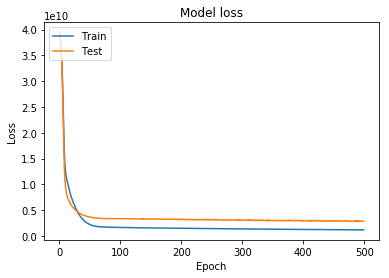

In [42]:
plt = plotHistory(history)
plt

In [49]:
NN_500E_1H = Sequential()
NN_500E_1H.add(Dense(512,input_dim = 330,activation = 'relu'))
NN_500E_1H.add(Dense(512,activation = 'relu'))
NN_500E_1H.add(Dense(1))
NN_500E_1H.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 512)               169472    
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 513       
Total params: 432,641
Trainable params: 432,641
Non-trainable params: 0
_________________________________________________________________


In [50]:
newAdam = Adam(learning_rate=0.0001)
NN_500E_1H.compile(loss='mean_squared_error', optimizer=newAdam)
history = NN_500E_1H.fit(x=X,y=y,epochs=500,validation_split=0.2)

Train on 1167 samples, validate on 292 samples
Epoch 1/500
1167/1167 [==============================] - 0s 274us/step - loss: 37315028674.3582 - val_loss: 37191868359.8904
Epoch 2/500
1167/1167 [==============================] - 0s 173us/step - loss: 34670875241.7344 - val_loss: 34077835656.7671
Epoch 3/500
1167/1167 [==============================] - 0s 172us/step - loss: 30991707826.5638 - val_loss: 29510343750.1370
Epoch 4/500
1167/1167 [==============================] - 0s 181us/step - loss: 26036271552.3839 - val_loss: 23620228306.4110
Epoch 5/500
1167/1167 [==============================] - 0s 174us/step - loss: 20506454550.3753 - val_loss: 17563180817.5342
Epoch 6/500
1167/1167 [==============================] - 0s 171us/step - loss: 16197170727.9246 - val_loss: 13097517168.2192
Epoch 7/500
1167/1167 [==============================] - 0s 168us/step - loss: 13490555313.4670 - val_loss: 10542575125.0411
Epoch 8/500
1167/1167 [==============================] - 0s 167us/step - loss:

Epoch 132/500
1167/1167 [==============================] - 0s 172us/step - loss: 1499194769.6590 - val_loss: 3228848405.0411
Epoch 133/500
1167/1167 [==============================] - 0s 175us/step - loss: 1494834233.9126 - val_loss: 3203703075.0685
Epoch 134/500
1167/1167 [==============================] - 0s 173us/step - loss: 1493585565.2853 - val_loss: 3217558794.5205
Epoch 135/500
1167/1167 [==============================] - 0s 176us/step - loss: 1496104212.6204 - val_loss: 3188617789.3699
Epoch 136/500
1167/1167 [==============================] - 0s 174us/step - loss: 1494191274.8312 - val_loss: 3298419843.5068
Epoch 137/500
1167/1167 [==============================] - 0s 170us/step - loss: 1487912581.0454 - val_loss: 3203506900.1644
Epoch 138/500
1167/1167 [==============================] - 0s 172us/step - loss: 1495450916.8535 - val_loss: 3238017388.7123
Epoch 139/500
1167/1167 [==============================] - 0s 172us/step - loss: 1487215100.0514 - val_loss: 3229990629.6986


1167/1167 [==============================] - 0s 175us/step - loss: 1331742575.9040 - val_loss: 2983347953.9726
Epoch 263/500
1167/1167 [==============================] - 0s 168us/step - loss: 1322969068.1474 - val_loss: 2999233437.8082
Epoch 264/500
1167/1167 [==============================] - 0s 171us/step - loss: 1325709812.3736 - val_loss: 2948871111.8904
Epoch 265/500
1167/1167 [==============================] - 0s 169us/step - loss: 1319454295.1705 - val_loss: 3027924883.2877
Epoch 266/500
1167/1167 [==============================] - 0s 168us/step - loss: 1319151775.4790 - val_loss: 2978417109.9178
Epoch 267/500
1167/1167 [==============================] - 0s 174us/step - loss: 1316628719.1637 - val_loss: 2983793849.8630
Epoch 268/500
1167/1167 [==============================] - 0s 165us/step - loss: 1324831273.9537 - val_loss: 3020292837.6986
Epoch 269/500
1167/1167 [==============================] - 0s 172us/step - loss: 1319023766.7592 - val_loss: 2923802243.5068
Epoch 270/500


1167/1167 [==============================] - 0s 167us/step - loss: 1194996301.6555 - val_loss: 2860333389.1507
Epoch 393/500
1167/1167 [==============================] - 0s 176us/step - loss: 1187779177.9537 - val_loss: 2812116793.8630
Epoch 394/500
1167/1167 [==============================] - 0s 174us/step - loss: 1186398046.2725 - val_loss: 2826688878.4658
Epoch 395/500
1167/1167 [==============================] - 0s 175us/step - loss: 1189064424.7198 - val_loss: 2785884032.0000
Epoch 396/500
1167/1167 [==============================] - 0s 174us/step - loss: 1188443536.5621 - val_loss: 2836600046.4658
Epoch 397/500
1167/1167 [==============================] - 0s 166us/step - loss: 1185510655.2322 - val_loss: 2776230901.4795
Epoch 398/500
1167/1167 [==============================] - 0s 176us/step - loss: 1187375549.3128 - val_loss: 2809821203.2877
Epoch 399/500
1167/1167 [==============================] - 0s 175us/step - loss: 1180257150.9580 - val_loss: 2774626161.9726
Epoch 400/500


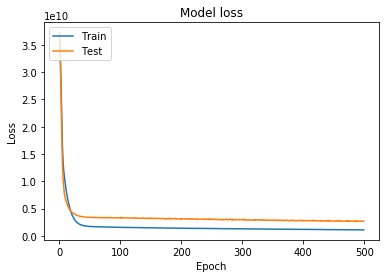

In [51]:
plt = plotHistory(history)
plt

In [53]:
from keras.layers import LeakyReLU

In [9]:
NN_500E_Adam_LReLU = Sequential()
NN_500E_Adam_LReLU.add(Dense(512,input_dim = IN_DIM))
NN_500E_Adam_LReLU.add(LeakyReLU(alpha=0.1))
NN_500E_Adam_LReLU.add(Dense(512))
NN_500E_Adam_LReLU.add(LeakyReLU(alpha=0.1))
NN_500E_Adam_LReLU.add(Dense(512))
NN_500E_Adam_LReLU.add(LeakyReLU(alpha=0.1))
NN_500E_Adam_LReLU.add(Dense(1))
NN_500E_Adam_LReLU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               207872    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [14]:
NN_500E_Adam_LReLU.compile(loss='mean_squared_error', optimizer='adam')
history = NN_500E_Adam_LReLU.fit(x=X,y=y,batch_size=TRAIN_LEN,epochs=500,validation_split=0.2)

Train on 1164 samples, validate on 292 samples
Epoch 1/500
1164/1164 [==============================] - 0s 128us/step - loss: 1132822656.0000 - val_loss: 3111554304.0000
Epoch 2/500
1164/1164 [==============================] - 0s 24us/step - loss: 3090528768.0000 - val_loss: 1536600320.0000
Epoch 3/500
1164/1164 [==============================] - 0s 21us/step - loss: 1127461120.0000 - val_loss: 3096504320.0000
Epoch 4/500
1164/1164 [==============================] - 0s 22us/step - loss: 2590830592.0000 - val_loss: 2544436224.0000
Epoch 5/500
1164/1164 [==============================] - 0s 21us/step - loss: 2019893120.0000 - val_loss: 1605175168.0000
Epoch 6/500
1164/1164 [==============================] - 0s 23us/step - loss: 1158199296.0000 - val_loss: 1671871744.0000
Epoch 7/500
1164/1164 [==============================] - 0s 22us/step - loss: 1403308160.0000 - val_loss: 2038270336.0000
Epoch 8/500
1164/1164 [==============================] - 0s 22us/step - loss: 1870407808.0000 - va

Epoch 68/500
1164/1164 [==============================] - 0s 23us/step - loss: 1118319232.0000 - val_loss: 1544869504.0000
Epoch 69/500
1164/1164 [==============================] - 0s 22us/step - loss: 1118459904.0000 - val_loss: 1540610304.0000
Epoch 70/500
1164/1164 [==============================] - 0s 21us/step - loss: 1117089536.0000 - val_loss: 1534191744.0000
Epoch 71/500
1164/1164 [==============================] - 0s 23us/step - loss: 1116189568.0000 - val_loss: 1530053760.0000
Epoch 72/500
1164/1164 [==============================] - 0s 23us/step - loss: 1116561280.0000 - val_loss: 1529394048.0000
Epoch 73/500
1164/1164 [==============================] - 0s 22us/step - loss: 1116533760.0000 - val_loss: 1531975168.0000
Epoch 74/500
1164/1164 [==============================] - 0s 22us/step - loss: 1115476480.0000 - val_loss: 1537012480.0000
Epoch 75/500
1164/1164 [==============================] - 0s 22us/step - loss: 1114795392.0000 - val_loss: 1541759744.0000
Epoch 76/500
116

Epoch 135/500
1164/1164 [==============================] - 0s 22us/step - loss: 1092834176.0000 - val_loss: 1544153984.0000
Epoch 136/500
1164/1164 [==============================] - 0s 23us/step - loss: 1092452096.0000 - val_loss: 1544417024.0000
Epoch 137/500
1164/1164 [==============================] - 0s 24us/step - loss: 1092067968.0000 - val_loss: 1544593024.0000
Epoch 138/500
1164/1164 [==============================] - 0s 22us/step - loss: 1091683584.0000 - val_loss: 1544639360.0000
Epoch 139/500
1164/1164 [==============================] - 0s 22us/step - loss: 1091300352.0000 - val_loss: 1544584704.0000
Epoch 140/500
1164/1164 [==============================] - 0s 24us/step - loss: 1090917248.0000 - val_loss: 1544582400.0000
Epoch 141/500
1164/1164 [==============================] - 0s 22us/step - loss: 1090533504.0000 - val_loss: 1544726784.0000
Epoch 142/500
1164/1164 [==============================] - 0s 23us/step - loss: 1090147456.0000 - val_loss: 1544897024.0000
Epoch 14

1164/1164 [==============================] - 0s 23us/step - loss: 1066299008.0000 - val_loss: 1550261504.0000
Epoch 202/500
1164/1164 [==============================] - 0s 24us/step - loss: 1065885952.0000 - val_loss: 1550321536.0000
Epoch 203/500
1164/1164 [==============================] - 0s 22us/step - loss: 1065440256.0000 - val_loss: 1550252800.0000
Epoch 204/500
1164/1164 [==============================] - 0s 23us/step - loss: 1065030144.0000 - val_loss: 1550147840.0000
Epoch 205/500
1164/1164 [==============================] - 0s 23us/step - loss: 1064588544.0000 - val_loss: 1550418688.0000
Epoch 206/500
1164/1164 [==============================] - 0s 22us/step - loss: 1064143360.0000 - val_loss: 1550566144.0000
Epoch 207/500
1164/1164 [==============================] - 0s 23us/step - loss: 1063709952.0000 - val_loss: 1550337920.0000
Epoch 208/500
1164/1164 [==============================] - 0s 22us/step - loss: 1063270912.0000 - val_loss: 1549831168.0000
Epoch 209/500
1164/116

Epoch 268/500
1164/1164 [==============================] - 0s 23us/step - loss: 1034338816.0000 - val_loss: 1551852544.0000
Epoch 269/500
1164/1164 [==============================] - 0s 23us/step - loss: 1033789760.0000 - val_loss: 1551555072.0000
Epoch 270/500
1164/1164 [==============================] - 0s 22us/step - loss: 1033247232.0000 - val_loss: 1551652736.0000
Epoch 271/500
1164/1164 [==============================] - 0s 23us/step - loss: 1032713152.0000 - val_loss: 1552035840.0000
Epoch 272/500
1164/1164 [==============================] - 0s 22us/step - loss: 1032150464.0000 - val_loss: 1551839744.0000
Epoch 273/500
1164/1164 [==============================] - 0s 21us/step - loss: 1031638976.0000 - val_loss: 1551774592.0000
Epoch 274/500
1164/1164 [==============================] - 0s 23us/step - loss: 1031075072.0000 - val_loss: 1552515456.0000
Epoch 275/500
1164/1164 [==============================] - 0s 23us/step - loss: 1030481088.0000 - val_loss: 1552660224.0000
Epoch 27

Epoch 335/500
1164/1164 [==============================] - 0s 23us/step - loss: 991357120.0000 - val_loss: 1551486208.0000
Epoch 336/500
1164/1164 [==============================] - 0s 21us/step - loss: 990576960.0000 - val_loss: 1546175744.0000
Epoch 337/500
1164/1164 [==============================] - 0s 22us/step - loss: 989744832.0000 - val_loss: 1547384576.0000
Epoch 338/500
1164/1164 [==============================] - 0s 22us/step - loss: 988879488.0000 - val_loss: 1548253824.0000
Epoch 339/500
1164/1164 [==============================] - 0s 22us/step - loss: 988051840.0000 - val_loss: 1547079936.0000
Epoch 340/500
1164/1164 [==============================] - 0s 24us/step - loss: 987360192.0000 - val_loss: 1551044352.0000
Epoch 341/500
1164/1164 [==============================] - 0s 22us/step - loss: 986618944.0000 - val_loss: 1545955072.0000
Epoch 342/500
1164/1164 [==============================] - 0s 23us/step - loss: 985743744.0000 - val_loss: 1547206016.0000
Epoch 343/500
11

Epoch 402/500
1164/1164 [==============================] - 0s 22us/step - loss: 933100416.0000 - val_loss: 1521411584.0000
Epoch 403/500
1164/1164 [==============================] - 0s 21us/step - loss: 930659392.0000 - val_loss: 1541016064.0000
Epoch 404/500
1164/1164 [==============================] - 0s 22us/step - loss: 927284032.0000 - val_loss: 1523885184.0000
Epoch 405/500
1164/1164 [==============================] - 0s 23us/step - loss: 924252800.0000 - val_loss: 1529503616.0000
Epoch 406/500
1164/1164 [==============================] - 0s 23us/step - loss: 922196288.0000 - val_loss: 1532018688.0000
Epoch 407/500
1164/1164 [==============================] - 0s 23us/step - loss: 921324672.0000 - val_loss: 1522319104.0000
Epoch 408/500
1164/1164 [==============================] - 0s 23us/step - loss: 921262272.0000 - val_loss: 1539541376.0000
Epoch 409/500
1164/1164 [==============================] - 0s 24us/step - loss: 921379904.0000 - val_loss: 1519012096.0000
Epoch 410/500
11

Epoch 469/500
1164/1164 [==============================] - 0s 23us/step - loss: 881507392.0000 - val_loss: 1506685056.0000
Epoch 470/500
1164/1164 [==============================] - 0s 23us/step - loss: 870114112.0000 - val_loss: 1524763264.0000
Epoch 471/500
1164/1164 [==============================] - 0s 22us/step - loss: 855606656.0000 - val_loss: 1512831872.0000
Epoch 472/500
1164/1164 [==============================] - 0s 22us/step - loss: 850968256.0000 - val_loss: 1502479744.0000
Epoch 473/500
1164/1164 [==============================] - 0s 22us/step - loss: 856532672.0000 - val_loss: 1544334080.0000
Epoch 474/500
1164/1164 [==============================] - 0s 23us/step - loss: 864668672.0000 - val_loss: 1506667648.0000
Epoch 475/500
1164/1164 [==============================] - 0s 23us/step - loss: 871491968.0000 - val_loss: 1551837952.0000
Epoch 476/500
1164/1164 [==============================] - 0s 22us/step - loss: 868209152.0000 - val_loss: 1503614720.0000
Epoch 477/500
11

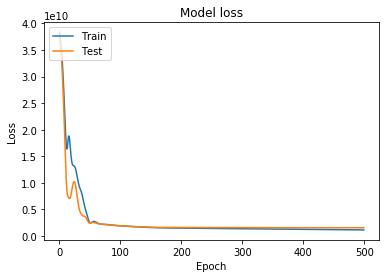

In [13]:
plt = plotHistory(history)
plt

Train on 1164 samples, validate on 292 samples
Epoch 1/1000
1164/1164 [==============================] - 0s 131us/step - loss: 195837.5156 - val_loss: 190412.3750
Epoch 2/1000
1164/1164 [==============================] - 0s 23us/step - loss: 190527.8750 - val_loss: 184706.3750
Epoch 3/1000
1164/1164 [==============================] - 0s 23us/step - loss: 184732.1250 - val_loss: 177407.1562
Epoch 4/1000
1164/1164 [==============================] - 0s 22us/step - loss: 177498.1562 - val_loss: 167916.0156
Epoch 5/1000
1164/1164 [==============================] - 0s 22us/step - loss: 168439.4844 - val_loss: 155818.9531
Epoch 6/1000
1164/1164 [==============================] - 0s 22us/step - loss: 157591.8281 - val_loss: 140952.8438
Epoch 7/1000
1164/1164 [==============================] - 0s 23us/step - loss: 145666.6094 - val_loss: 124073.9453
Epoch 8/1000
1164/1164 [==============================] - 0s 22us/step - loss: 134824.0000 - val_loss: 106170.7656
Epoch 9/1000
1164/1164 [========

Epoch 73/1000
1164/1164 [==============================] - 0s 23us/step - loss: 42844.3711 - val_loss: 43018.0312
Epoch 74/1000
1164/1164 [==============================] - 0s 22us/step - loss: 42673.4570 - val_loss: 42846.4180
Epoch 75/1000
1164/1164 [==============================] - 0s 23us/step - loss: 42584.4648 - val_loss: 42721.2188
Epoch 76/1000
1164/1164 [==============================] - 0s 23us/step - loss: 42471.1289 - val_loss: 42630.7617
Epoch 77/1000
1164/1164 [==============================] - 0s 22us/step - loss: 42357.5469 - val_loss: 42552.6211
Epoch 78/1000
1164/1164 [==============================] - 0s 22us/step - loss: 42262.8711 - val_loss: 42404.9180
Epoch 79/1000
1164/1164 [==============================] - 0s 23us/step - loss: 42111.8633 - val_loss: 42227.5898
Epoch 80/1000
1164/1164 [==============================] - 0s 23us/step - loss: 41938.8633 - val_loss: 42083.0859
Epoch 81/1000
1164/1164 [==============================] - 0s 22us/step - loss: 41781.16

Epoch 145/1000
1164/1164 [==============================] - 0s 22us/step - loss: 38628.1875 - val_loss: 40280.3711
Epoch 146/1000
1164/1164 [==============================] - 0s 24us/step - loss: 38614.6523 - val_loss: 40264.7148
Epoch 147/1000
1164/1164 [==============================] - 0s 22us/step - loss: 38601.0430 - val_loss: 40261.2461
Epoch 148/1000
1164/1164 [==============================] - 0s 22us/step - loss: 38587.5156 - val_loss: 40259.4961
Epoch 149/1000
1164/1164 [==============================] - 0s 22us/step - loss: 38574.1523 - val_loss: 40248.4102
Epoch 150/1000
1164/1164 [==============================] - 0s 23us/step - loss: 38561.1875 - val_loss: 40240.9570
Epoch 151/1000
1164/1164 [==============================] - 0s 22us/step - loss: 38548.8242 - val_loss: 40241.2969
Epoch 152/1000
1164/1164 [==============================] - 0s 23us/step - loss: 38536.5156 - val_loss: 40233.2383
Epoch 153/1000
1164/1164 [==============================] - 0s 23us/step - loss:

Epoch 217/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37831.5508 - val_loss: 40044.5000
Epoch 218/1000
1164/1164 [==============================] - 0s 23us/step - loss: 37821.1875 - val_loss: 40035.1211
Epoch 219/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37810.9844 - val_loss: 40042.3867
Epoch 220/1000
1164/1164 [==============================] - 0s 23us/step - loss: 37800.5039 - val_loss: 40027.9883
Epoch 221/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37790.0469 - val_loss: 40037.2539
Epoch 222/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37779.6562 - val_loss: 40021.1367
Epoch 223/1000
1164/1164 [==============================] - 0s 23us/step - loss: 37768.9961 - val_loss: 40035.3711
Epoch 224/1000
1164/1164 [==============================] - 0s 23us/step - loss: 37758.1875 - val_loss: 40016.1680
Epoch 225/1000
1164/1164 [==============================] - 0s 23us/step - loss:

Epoch 289/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37248.1875 - val_loss: 40233.4883
Epoch 290/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37160.8125 - val_loss: 39725.1211
Epoch 291/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37050.1914 - val_loss: 39822.4883
Epoch 292/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37003.5039 - val_loss: 40035.2383
Epoch 293/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37036.4961 - val_loss: 39668.7930
Epoch 294/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37087.9570 - val_loss: 40182.9883
Epoch 295/1000
1164/1164 [==============================] - 0s 22us/step - loss: 37082.9531 - val_loss: 39687.0781
Epoch 296/1000
1164/1164 [==============================] - 0s 24us/step - loss: 37026.6836 - val_loss: 39934.0352
Epoch 297/1000
1164/1164 [==============================] - 0s 24us/step - loss:

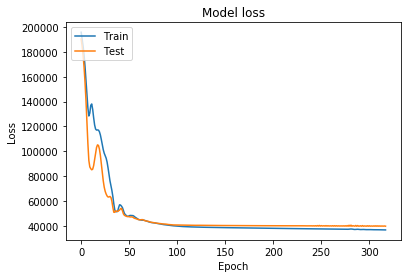

In [87]:
NN_500E_Adam_LReLU05 = Sequential()
NN_500E_Adam_LReLU05.add(Dense(512,input_dim = IN_DIM))
NN_500E_Adam_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam_LReLU05.add(Dense(512))
NN_500E_Adam_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam_LReLU05.add(Dense(512))
NN_500E_Adam_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam_LReLU05.add(Dense(1))

es = EarlyStopping(monitor='val_loss', patience = 30, mode='min', restore_best_weights=True, verbose=1)
NN_500E_Adam_LReLU05.compile(loss=root_mean_squared_error, optimizer='adam')
history = NN_500E_Adam_LReLU05.fit(x=X,y=y,batch_size=TRAIN_LEN,epochs=1000,validation_split=0.2,callbacks=[es])

plt = plotHistory(history)
plt

Train on 1164 samples, validate on 292 samples
Epoch 1/10000
1164/1164 [==============================] - 0s 136us/step - loss: 195136.5781 - val_loss: 194323.0469
Epoch 2/10000
1164/1164 [==============================] - 0s 25us/step - loss: 194573.4219 - val_loss: 193776.8906
Epoch 3/10000
1164/1164 [==============================] - 0s 24us/step - loss: 194005.5156 - val_loss: 193277.9531
Epoch 4/10000
1164/1164 [==============================] - 0s 23us/step - loss: 193487.9844 - val_loss: 192726.0156
Epoch 5/10000
1164/1164 [==============================] - 0s 22us/step - loss: 192916.1562 - val_loss: 192168.1719
Epoch 6/10000
1164/1164 [==============================] - 0s 22us/step - loss: 192339.9844 - val_loss: 191601.4531
Epoch 7/10000
1164/1164 [==============================] - 0s 22us/step - loss: 191755.3906 - val_loss: 191022.6094
Epoch 8/10000
1164/1164 [==============================] - 0s 23us/step - loss: 191159.4375 - val_loss: 190431.1562
Epoch 9/10000
1164/1164 

Epoch 71/10000
1164/1164 [==============================] - 0s 23us/step - loss: 125915.7812 - val_loss: 95719.1875
Epoch 72/10000
1164/1164 [==============================] - 0s 23us/step - loss: 125674.0234 - val_loss: 95418.5859
Epoch 73/10000
1164/1164 [==============================] - 0s 22us/step - loss: 125397.9375 - val_loss: 95212.3125
Epoch 74/10000
1164/1164 [==============================] - 0s 23us/step - loss: 125089.7578 - val_loss: 95090.5234
Epoch 75/10000
1164/1164 [==============================] - 0s 22us/step - loss: 124753.7578 - val_loss: 95043.5078
Epoch 76/10000
1164/1164 [==============================] - 0s 23us/step - loss: 124395.7812 - val_loss: 95061.3203
Epoch 77/10000
1164/1164 [==============================] - 0s 22us/step - loss: 124022.0625 - val_loss: 95134.0625
Epoch 78/10000
1164/1164 [==============================] - 0s 23us/step - loss: 123639.8203 - val_loss: 95251.6875
Epoch 79/10000
1164/1164 [==============================] - 0s 24us/step

Epoch 142/10000
1164/1164 [==============================] - 0s 23us/step - loss: 93528.0781 - val_loss: 75390.5781
Epoch 143/10000
1164/1164 [==============================] - 0s 23us/step - loss: 92712.0781 - val_loss: 74800.5938
Epoch 144/10000
1164/1164 [==============================] - 0s 22us/step - loss: 91877.2969 - val_loss: 74202.2422
Epoch 145/10000
1164/1164 [==============================] - 0s 23us/step - loss: 91023.2969 - val_loss: 73596.2422
Epoch 146/10000
1164/1164 [==============================] - 0s 22us/step - loss: 90150.6797 - val_loss: 72982.6562
Epoch 147/10000
1164/1164 [==============================] - 0s 23us/step - loss: 89258.3125 - val_loss: 72362.2578
Epoch 148/10000
1164/1164 [==============================] - 0s 23us/step - loss: 88346.6875 - val_loss: 71734.6719
Epoch 149/10000
1164/1164 [==============================] - 0s 22us/step - loss: 87411.2578 - val_loss: 71101.9141
Epoch 150/10000
1164/1164 [==============================] - 0s 23us/ste

Epoch 213/10000
1164/1164 [==============================] - 0s 23us/step - loss: 48804.0117 - val_loss: 48769.2461
Epoch 214/10000
1164/1164 [==============================] - 0s 23us/step - loss: 48743.1133 - val_loss: 48709.0039
Epoch 215/10000
1164/1164 [==============================] - 0s 23us/step - loss: 48686.3789 - val_loss: 48651.2383
Epoch 216/10000
1164/1164 [==============================] - 0s 23us/step - loss: 48632.9883 - val_loss: 48595.5938
Epoch 217/10000
1164/1164 [==============================] - 0s 22us/step - loss: 48582.3555 - val_loss: 48541.8789
Epoch 218/10000
1164/1164 [==============================] - 0s 22us/step - loss: 48533.6133 - val_loss: 48489.8711
Epoch 219/10000
1164/1164 [==============================] - 0s 23us/step - loss: 48486.4883 - val_loss: 48439.2773
Epoch 220/10000
1164/1164 [==============================] - 0s 23us/step - loss: 48440.1133 - val_loss: 48389.9961
Epoch 221/10000
1164/1164 [==============================] - 0s 24us/ste

Epoch 284/10000
1164/1164 [==============================] - 0s 23us/step - loss: 45502.5430 - val_loss: 45697.4609
Epoch 285/10000
1164/1164 [==============================] - 0s 23us/step - loss: 45460.0352 - val_loss: 45658.8438
Epoch 286/10000
1164/1164 [==============================] - 0s 22us/step - loss: 45417.5430 - val_loss: 45620.3438
Epoch 287/10000
1164/1164 [==============================] - 0s 22us/step - loss: 45375.3438 - val_loss: 45581.8867
Epoch 288/10000
1164/1164 [==============================] - 0s 22us/step - loss: 45333.0039 - val_loss: 45543.5039
Epoch 289/10000
1164/1164 [==============================] - 0s 24us/step - loss: 45290.9570 - val_loss: 45505.1133
Epoch 290/10000
1164/1164 [==============================] - 0s 23us/step - loss: 45248.8789 - val_loss: 45466.6641
Epoch 291/10000
1164/1164 [==============================] - 0s 23us/step - loss: 45206.9609 - val_loss: 45428.2891
Epoch 292/10000
1164/1164 [==============================] - 0s 22us/ste

Epoch 355/10000
1164/1164 [==============================] - 0s 24us/step - loss: 42732.8320 - val_loss: 43196.5820
Epoch 356/10000
1164/1164 [==============================] - 0s 22us/step - loss: 42697.8711 - val_loss: 43165.8438
Epoch 357/10000
1164/1164 [==============================] - 0s 22us/step - loss: 42663.0117 - val_loss: 43135.2617
Epoch 358/10000
1164/1164 [==============================] - 0s 22us/step - loss: 42628.4570 - val_loss: 43104.8633
Epoch 359/10000
1164/1164 [==============================] - 0s 23us/step - loss: 42593.9570 - val_loss: 43074.5430
Epoch 360/10000
1164/1164 [==============================] - 0s 23us/step - loss: 42559.5039 - val_loss: 43044.2539
Epoch 361/10000
1164/1164 [==============================] - 0s 23us/step - loss: 42525.3398 - val_loss: 43013.9961
Epoch 362/10000
1164/1164 [==============================] - 0s 22us/step - loss: 42491.1641 - val_loss: 42983.8867
Epoch 363/10000
1164/1164 [==============================] - 0s 24us/ste

Epoch 426/10000
1164/1164 [==============================] - 0s 22us/step - loss: 40643.5117 - val_loss: 41418.4961
Epoch 427/10000
1164/1164 [==============================] - 0s 24us/step - loss: 40619.8672 - val_loss: 41399.7539
Epoch 428/10000
1164/1164 [==============================] - 0s 22us/step - loss: 40596.4883 - val_loss: 41381.0039
Epoch 429/10000
1164/1164 [==============================] - 0s 22us/step - loss: 40573.3242 - val_loss: 41362.0352
Epoch 430/10000
1164/1164 [==============================] - 0s 23us/step - loss: 40550.3555 - val_loss: 41343.2539
Epoch 431/10000
1164/1164 [==============================] - 0s 23us/step - loss: 40527.6719 - val_loss: 41324.7930
Epoch 432/10000
1164/1164 [==============================] - 0s 23us/step - loss: 40505.3555 - val_loss: 41306.5898
Epoch 433/10000
1164/1164 [==============================] - 0s 23us/step - loss: 40483.1445 - val_loss: 41288.7461
Epoch 434/10000
1164/1164 [==============================] - 0s 22us/ste

Epoch 497/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39483.0039 - val_loss: 40600.4180
Epoch 498/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39472.8594 - val_loss: 40595.1289
Epoch 499/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39462.8555 - val_loss: 40589.8633
Epoch 500/10000
1164/1164 [==============================] - 0s 22us/step - loss: 39452.9961 - val_loss: 40584.5430
Epoch 501/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39443.3203 - val_loss: 40579.2461
Epoch 502/10000
1164/1164 [==============================] - 0s 22us/step - loss: 39433.6719 - val_loss: 40574.1602
Epoch 503/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39424.1836 - val_loss: 40569.3320
Epoch 504/10000
1164/1164 [==============================] - 0s 24us/step - loss: 39414.9844 - val_loss: 40564.4570
Epoch 505/10000
1164/1164 [==============================] - 0s 21us/ste

Epoch 568/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39021.5039 - val_loss: 40425.8711
Epoch 569/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39017.5352 - val_loss: 40425.0117
Epoch 570/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39013.6484 - val_loss: 40424.0430
Epoch 571/10000
1164/1164 [==============================] - 0s 22us/step - loss: 39009.8516 - val_loss: 40423.0898
Epoch 572/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39006.0117 - val_loss: 40422.3633
Epoch 573/10000
1164/1164 [==============================] - 0s 23us/step - loss: 39002.3281 - val_loss: 40422.1602
Epoch 574/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38998.5469 - val_loss: 40421.8320
Epoch 575/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38994.9883 - val_loss: 40421.2070
Epoch 576/10000
1164/1164 [==============================] - 0s 21us/ste

Epoch 639/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38814.4531 - val_loss: 40388.3320
Epoch 640/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38812.0156 - val_loss: 40388.0000
Epoch 641/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38809.6445 - val_loss: 40387.4648
Epoch 642/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38807.1875 - val_loss: 40386.4961
Epoch 643/10000
1164/1164 [==============================] - 0s 24us/step - loss: 38804.9531 - val_loss: 40385.8633
Epoch 644/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38802.5156 - val_loss: 40385.2852
Epoch 645/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38800.3242 - val_loss: 40384.3711
Epoch 646/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38798.0039 - val_loss: 40383.5430
Epoch 647/10000
1164/1164 [==============================] - 0s 22us/ste

Epoch 710/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38661.6523 - val_loss: 40330.9961
Epoch 711/10000
1164/1164 [==============================] - 0s 24us/step - loss: 38659.5391 - val_loss: 40330.2148
Epoch 712/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38657.5039 - val_loss: 40329.7930
Epoch 713/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38655.4844 - val_loss: 40329.0039
Epoch 714/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38653.4492 - val_loss: 40328.0430
Epoch 715/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38651.3555 - val_loss: 40327.2461
Epoch 716/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38649.3242 - val_loss: 40326.7070
Epoch 717/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38647.1875 - val_loss: 40325.8711
Epoch 718/10000
1164/1164 [==============================] - 0s 22us/ste

Epoch 781/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38510.4531 - val_loss: 40263.8867
Epoch 782/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38508.4844 - val_loss: 40263.2109
Epoch 783/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38506.5039 - val_loss: 40261.8398
Epoch 784/10000
1164/1164 [==============================] - 0s 24us/step - loss: 38504.5391 - val_loss: 40260.5820
Epoch 785/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38502.6445 - val_loss: 40259.4961
Epoch 786/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38500.6523 - val_loss: 40258.5820
Epoch 787/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38498.6836 - val_loss: 40257.3633
Epoch 788/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38496.6875 - val_loss: 40255.8906
Epoch 789/10000
1164/1164 [==============================] - 0s 23us/ste

Epoch 852/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38372.6797 - val_loss: 40188.2070
Epoch 853/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38370.8125 - val_loss: 40186.0117
Epoch 854/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38368.8242 - val_loss: 40185.1133
Epoch 855/10000
1164/1164 [==============================] - 0s 24us/step - loss: 38366.8477 - val_loss: 40184.3711
Epoch 856/10000
1164/1164 [==============================] - 0s 24us/step - loss: 38364.8594 - val_loss: 40182.6719
Epoch 857/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38362.9531 - val_loss: 40181.3633
Epoch 858/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38360.9609 - val_loss: 40180.1211
Epoch 859/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38358.9883 - val_loss: 40179.1211
Epoch 860/10000
1164/1164 [==============================] - 0s 22us/ste

Epoch 923/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38246.9961 - val_loss: 40142.4570
Epoch 924/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38245.3125 - val_loss: 40142.4961
Epoch 925/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38243.5391 - val_loss: 40141.7891
Epoch 926/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38241.9531 - val_loss: 40141.1289
Epoch 927/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38240.1523 - val_loss: 40140.9961
Epoch 928/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38238.4961 - val_loss: 40140.8398
Epoch 929/10000
1164/1164 [==============================] - 0s 25us/step - loss: 38236.8125 - val_loss: 40140.5430
Epoch 930/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38235.0391 - val_loss: 40139.4102
Epoch 931/10000
1164/1164 [==============================] - 0s 22us/ste

Epoch 994/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38127.6445 - val_loss: 40100.6719
Epoch 995/10000
1164/1164 [==============================] - 0s 24us/step - loss: 38125.9883 - val_loss: 40100.3398
Epoch 996/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38124.3203 - val_loss: 40099.7070
Epoch 997/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38122.6445 - val_loss: 40098.7539
Epoch 998/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38121.0000 - val_loss: 40098.5781
Epoch 999/10000
1164/1164 [==============================] - 0s 22us/step - loss: 38119.3555 - val_loss: 40098.3711
Epoch 1000/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38117.6797 - val_loss: 40097.9570
Epoch 1001/10000
1164/1164 [==============================] - 0s 23us/step - loss: 38116.0117 - val_loss: 40097.3711
Epoch 1002/10000
1164/1164 [==============================] - 0s 22us/

1164/1164 [==============================] - 0s 22us/step - loss: 38000.5039 - val_loss: 40048.9961
Epoch 1065/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37998.4492 - val_loss: 40048.3320
Epoch 1066/10000
1164/1164 [==============================] - 0s 24us/step - loss: 37996.1875 - val_loss: 40047.0352
Epoch 1067/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37994.0469 - val_loss: 40046.3789
Epoch 1068/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37991.9961 - val_loss: 40046.5117
Epoch 1069/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37989.9883 - val_loss: 40045.1680
Epoch 1070/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37988.0039 - val_loss: 40044.7383
Epoch 1071/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37986.0391 - val_loss: 40045.7852
Epoch 1072/10000
1164/1164 [==============================] - 0s 22us/step - loss

Epoch 1135/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37870.8555 - val_loss: 40014.2461
Epoch 1136/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37869.1562 - val_loss: 40015.0859
Epoch 1137/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37867.4961 - val_loss: 40013.9570
Epoch 1138/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37865.8203 - val_loss: 40012.2617
Epoch 1139/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37864.1445 - val_loss: 40012.0039
Epoch 1140/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37862.4961 - val_loss: 40011.7656
Epoch 1141/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37860.8438 - val_loss: 40010.5430
Epoch 1142/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37859.1445 - val_loss: 40009.5039
Epoch 1143/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 24us/step - loss: 37752.3086 - val_loss: 39974.9180
Epoch 1206/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37750.5117 - val_loss: 39974.2969
Epoch 1207/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37748.8203 - val_loss: 39973.0117
Epoch 1208/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37747.0156 - val_loss: 39972.9219
Epoch 1209/10000
1164/1164 [==============================] - 0s 24us/step - loss: 37745.3203 - val_loss: 39972.9883
Epoch 1210/10000
1164/1164 [==============================] - 0s 24us/step - loss: 37743.5156 - val_loss: 39971.4219
Epoch 1211/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37741.8203 - val_loss: 39971.4180
Epoch 1212/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37740.0391 - val_loss: 39970.7656
Epoch 1213/10000
1164/1164 [==============================] - 0s 22us/step - loss

Epoch 1276/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37619.5039 - val_loss: 39935.0039
Epoch 1277/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37617.6797 - val_loss: 39934.4141
Epoch 1278/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37615.8555 - val_loss: 39934.6289
Epoch 1279/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37614.0039 - val_loss: 39933.5469
Epoch 1280/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37612.1562 - val_loss: 39933.2500
Epoch 1281/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37610.3203 - val_loss: 39933.4219
Epoch 1282/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37608.4609 - val_loss: 39932.3320
Epoch 1283/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37606.5156 - val_loss: 39931.0352
Epoch 1284/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 21us/step - loss: 37480.4961 - val_loss: 39887.5859
Epoch 1347/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37478.3516 - val_loss: 39887.1211
Epoch 1348/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37476.3086 - val_loss: 39885.4219
Epoch 1349/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37474.0469 - val_loss: 39884.0781
Epoch 1350/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37471.9531 - val_loss: 39883.8398
Epoch 1351/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37469.6797 - val_loss: 39882.6602
Epoch 1352/10000
1164/1164 [==============================] - 0s 21us/step - loss: 37467.5391 - val_loss: 39880.4180
Epoch 1353/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37465.5039 - val_loss: 39881.2617
Epoch 1354/10000
1164/1164 [==============================] - 0s 23us/step - loss

Epoch 1417/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37328.9609 - val_loss: 39819.6289
Epoch 1418/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37326.5430 - val_loss: 39816.2617
Epoch 1419/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37324.1836 - val_loss: 39816.5820
Epoch 1420/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37321.9609 - val_loss: 39815.7930
Epoch 1421/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37319.6836 - val_loss: 39813.6250
Epoch 1422/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37317.4844 - val_loss: 39814.4570
Epoch 1423/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37315.1562 - val_loss: 39812.9570
Epoch 1424/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37312.9844 - val_loss: 39812.3359
Epoch 1425/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 23us/step - loss: 37168.8555 - val_loss: 39748.3398
Epoch 1488/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37166.5039 - val_loss: 39748.4648
Epoch 1489/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37164.1484 - val_loss: 39747.5391
Epoch 1490/10000
1164/1164 [==============================] - 0s 24us/step - loss: 37161.8125 - val_loss: 39745.6289
Epoch 1491/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37159.4844 - val_loss: 39746.8359
Epoch 1492/10000
1164/1164 [==============================] - 0s 22us/step - loss: 37157.0391 - val_loss: 39743.1289
Epoch 1493/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37154.6562 - val_loss: 39743.6133
Epoch 1494/10000
1164/1164 [==============================] - 0s 23us/step - loss: 37152.3398 - val_loss: 39741.7148
Epoch 1495/10000
1164/1164 [==============================] - 0s 23us/step - loss

Epoch 1558/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36988.0469 - val_loss: 39675.5039
Epoch 1559/10000
1164/1164 [==============================] - 0s 24us/step - loss: 36985.4961 - val_loss: 39670.2617
Epoch 1560/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36982.8125 - val_loss: 39673.1289
Epoch 1561/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36980.1523 - val_loss: 39668.0430
Epoch 1562/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36977.4961 - val_loss: 39668.5039
Epoch 1563/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36974.8164 - val_loss: 39665.8281
Epoch 1564/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36972.0430 - val_loss: 39665.7461
Epoch 1565/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36969.3438 - val_loss: 39663.0430
Epoch 1566/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 22us/step - loss: 36794.3125 - val_loss: 39597.5039
Epoch 1629/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36791.3398 - val_loss: 39583.2148
Epoch 1630/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36788.3398 - val_loss: 39589.2891
Epoch 1631/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36785.4844 - val_loss: 39583.2070
Epoch 1632/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36782.4961 - val_loss: 39584.2383
Epoch 1633/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36779.5117 - val_loss: 39585.1406
Epoch 1634/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36776.6602 - val_loss: 39580.7148
Epoch 1635/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36773.6953 - val_loss: 39588.0430
Epoch 1636/10000
1164/1164 [==============================] - 0s 22us/step - loss

Epoch 1699/10000
1164/1164 [==============================] - 0s 24us/step - loss: 36577.1523 - val_loss: 39497.5039
Epoch 1700/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36574.0117 - val_loss: 39514.8789
Epoch 1701/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36571.0156 - val_loss: 39486.5117
Epoch 1702/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36568.0508 - val_loss: 39520.0117
Epoch 1703/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36565.0156 - val_loss: 39481.4180
Epoch 1704/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36561.9531 - val_loss: 39518.5430
Epoch 1705/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36558.5508 - val_loss: 39480.1367
Epoch 1706/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36555.1992 - val_loss: 39512.5430
Epoch 1707/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 22us/step - loss: 36340.6992 - val_loss: 39442.6289
Epoch 1770/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36337.4961 - val_loss: 39377.2852
Epoch 1771/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36333.9844 - val_loss: 39435.9609
Epoch 1772/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36329.8047 - val_loss: 39383.9648
Epoch 1773/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36325.3086 - val_loss: 39416.0859
Epoch 1774/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36320.8477 - val_loss: 39399.5859
Epoch 1775/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36316.8398 - val_loss: 39393.4141
Epoch 1776/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36313.1953 - val_loss: 39413.5898
Epoch 1777/10000
1164/1164 [==============================] - 0s 24us/step - loss

Epoch 1840/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36069.1602 - val_loss: 39247.6289
Epoch 1841/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36065.6641 - val_loss: 39338.5039
Epoch 1842/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36060.9961 - val_loss: 39249.2148
Epoch 1843/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36056.0469 - val_loss: 39321.2383
Epoch 1844/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36050.3359 - val_loss: 39264.5117
Epoch 1845/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36044.5039 - val_loss: 39288.5781
Epoch 1846/10000
1164/1164 [==============================] - 0s 22us/step - loss: 36039.4453 - val_loss: 39287.2383
Epoch 1847/10000
1164/1164 [==============================] - 0s 23us/step - loss: 36035.1875 - val_loss: 39259.2539
Epoch 1848/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 24us/step - loss: 35762.4453 - val_loss: 39119.0781
Epoch 1911/10000
1164/1164 [==============================] - 0s 24us/step - loss: 35759.1562 - val_loss: 39219.2109
Epoch 1912/10000
1164/1164 [==============================] - 0s 23us/step - loss: 35754.8125 - val_loss: 39113.7109
Epoch 1913/10000
1164/1164 [==============================] - 0s 23us/step - loss: 35750.3359 - val_loss: 39210.0039
Epoch 1914/10000
1164/1164 [==============================] - 0s 23us/step - loss: 35744.3047 - val_loss: 39123.9570
Epoch 1915/10000
1164/1164 [==============================] - 0s 23us/step - loss: 35737.5391 - val_loss: 39179.1133
Epoch 1916/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35730.9492 - val_loss: 39148.7461
Epoch 1917/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35725.0508 - val_loss: 39143.7539
Epoch 1918/10000
1164/1164 [==============================] - 0s 21us/step - loss

Epoch 1981/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35411.3047 - val_loss: 39066.4883
Epoch 1982/10000
1164/1164 [==============================] - 0s 23us/step - loss: 35407.4570 - val_loss: 38981.7148
Epoch 1983/10000
1164/1164 [==============================] - 0s 23us/step - loss: 35403.5508 - val_loss: 39075.3711
Epoch 1984/10000
1164/1164 [==============================] - 0s 21us/step - loss: 35399.4492 - val_loss: 38971.1094
Epoch 1985/10000
1164/1164 [==============================] - 0s 24us/step - loss: 35395.3086 - val_loss: 39077.7930
Epoch 1986/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35390.1914 - val_loss: 38967.4883
Epoch 1987/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35385.3320 - val_loss: 39072.4219
Epoch 1988/10000
1164/1164 [==============================] - 0s 23us/step - loss: 35379.0156 - val_loss: 38974.1367
Epoch 1989/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 22us/step - loss: 35032.9570 - val_loss: 38953.6641
Epoch 2052/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35030.3438 - val_loss: 38848.2930
Epoch 2053/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35027.9961 - val_loss: 38971.5352
Epoch 2054/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35024.1953 - val_loss: 38836.8867
Epoch 2055/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35019.1562 - val_loss: 38962.1211
Epoch 2056/10000
1164/1164 [==============================] - 0s 23us/step - loss: 35011.5039 - val_loss: 38846.4570
Epoch 2057/10000
1164/1164 [==============================] - 0s 22us/step - loss: 35002.9961 - val_loss: 38927.2930
Epoch 2058/10000
1164/1164 [==============================] - 0s 23us/step - loss: 34993.9961 - val_loss: 38874.4961
Epoch 2059/10000
1164/1164 [==============================] - 0s 23us/step - loss

Epoch 2122/10000
1164/1164 [==============================] - 0s 22us/step - loss: 34610.3008 - val_loss: 38735.2461
Epoch 2123/10000
1164/1164 [==============================] - 0s 22us/step - loss: 34605.9844 - val_loss: 38826.2461
Epoch 2124/10000
1164/1164 [==============================] - 0s 24us/step - loss: 34602.1602 - val_loss: 38710.9883
Epoch 2125/10000
1164/1164 [==============================] - 0s 23us/step - loss: 34599.6602 - val_loss: 38854.3711
Epoch 2126/10000
1164/1164 [==============================] - 0s 21us/step - loss: 34597.5430 - val_loss: 38685.0781
Epoch 2127/10000
1164/1164 [==============================] - 0s 22us/step - loss: 34598.1953 - val_loss: 38888.4648
Epoch 2128/10000
1164/1164 [==============================] - 0s 23us/step - loss: 34597.9844 - val_loss: 38664.4219
Epoch 2129/10000
1164/1164 [==============================] - 0s 22us/step - loss: 34597.8398 - val_loss: 38898.3398
Epoch 2130/10000
1164/1164 [==============================] - 0s

1164/1164 [==============================] - 0s 22us/step - loss: 34163.5547 - val_loss: 38651.0781
Epoch 2193/10000
1164/1164 [==============================] - 0s 22us/step - loss: 34155.8008 - val_loss: 38673.1289
Epoch 2194/10000
1164/1164 [==============================] - 0s 22us/step - loss: 34150.5117 - val_loss: 38608.8281
Epoch 2195/10000
1164/1164 [==============================] - 0s 22us/step - loss: 34146.8008 - val_loss: 38703.8867
Epoch 2196/10000
1164/1164 [==============================] - 0s 23us/step - loss: 34143.2930 - val_loss: 38584.7930
Epoch 2197/10000
1164/1164 [==============================] - 0s 22us/step - loss: 34139.6992 - val_loss: 38717.9141
Epoch 2198/10000
1164/1164 [==============================] - 0s 22us/step - loss: 34134.6719 - val_loss: 38574.9883
Epoch 2199/10000
1164/1164 [==============================] - 0s 23us/step - loss: 34129.4844 - val_loss: 38717.7070
Epoch 2200/10000
1164/1164 [==============================] - 0s 22us/step - loss

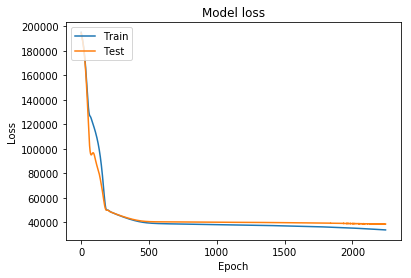

In [91]:
NN_500E_Adam31_LReLU05 = Sequential()
NN_500E_Adam31_LReLU05.add(Dense(512,input_dim = IN_DIM))
NN_500E_Adam31_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam31_LReLU05.add(Dense(512))
NN_500E_Adam31_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam31_LReLU05.add(Dense(512))
NN_500E_Adam31_LReLU05.add(LeakyReLU(alpha=0.5))
NN_500E_Adam31_LReLU05.add(Dense(1))

newAdam = Adam(learning_rate=0.0001)
es = EarlyStopping(monitor='val_loss', patience = 30, mode='min', restore_best_weights=True, verbose=1)
NN_500E_Adam31_LReLU05.compile(loss=root_mean_squared_error, optimizer=newAdam)
history = NN_500E_Adam31_LReLU05.fit(x=X,y=y,batch_size=TRAIN_LEN,epochs=10000,validation_split=0.2,callbacks=[es])

plt = plotHistory(history)
plt

In [92]:
y_df = pd.DataFrame(pred(NN_500E_Adam31_LReLU05))
y_df = y_df.rename(columns={0:'SalePrice'})
out = Id.copy()
out = out.join(y_df)
out

,Id,SalePrice
0,1461,119317.781250
1,1462,230065.593750
2,1463,196312.937500
3,1464,189931.125000
4,1465,170798.781250
...,...,...
1454,2915,92498.351562
1455,2916,100146.835938
1456,2917,192835.781250
1457,2918,109085.664062


In [93]:
out.to_csv(r'~/Datas/KaggleHouse/NN_500E_Adam31_LReLU05_V2_Nolog.csv',index = False)